# 01. a. Introduction Into Data Analytics
One doesn't simply become a data scientist...

### Author: Daniel Kurniadi, MLDA Executive in Academic Division

<img src="images/AWS_Banner.jpg"/>

### Abstract:

The purpose of this research is to try a machine learning approach for predicting Diabetes diagnosis for medical application by looking at medical checkup result. The research contains: Data exploration, feature engineering, choosing appropriate scoring metric, cross algorithms, cross validation, tuning the algorithms,analysis of feature importance, analysis of residuals and performance evaluation. The used dataset is from years 1994.


### Introduction:

Diabetes patient records were obtained from two sources: an automatic electronic recording device and paper records. The automatic device had an internal clock to timestamp events, whereas the paper records only provided "logical time" slots (breakfast, lunch, dinner, bedtime). For paper records, fixed times were assigned to breakfast (08:00), lunch (12:00), dinner (18:00), and bedtime (22:00). Thus paper records have fictitious uniform recording times whereas electronic records have more realistic time stamps.

## Workshop Outline
- <u>01.a.Introduction into Data Analytics (this workshop)
- [01.b.Machine Learning in Cloud](#02.ML_in_Cloud.ipynb)

### Table of Content

**1. Project Setup** 
* 1.1 [Load libraries](#Load-libraries)
* 1.2 [Load dataset](#Load-dataset)

**2. Exploratory data analysis** 
* 2.1 [Understand the data with descriptive statistics](#Understand-the-data-with-descriptive-statistics)
* 2.2 [Understand the data with plotting](#Understand-the-data-with-plotting)

**3. Data preparation** 
* 3.1 [Data cleaning](#Data-cleaning)
* 3.2 [Data transforms](#Data-transforms)
* 3.3 [Feature selection](#Feature-selection)

**4. Model evaluation** 
* 4.1 [Train Test split](#Train-Test-split)
* 4.2 [Train model](#Train-model)
* 4.3 [Test evaluation metric](#Test-evaluation-metric)

**5. Model tuning**
* 5.1 [Hyperparameter tuning](#Hyperparameter-tuning)

**6. Model understanding**
* 6.1 [Feature importance](#Feature-importance)
* 6.2 [Paritial dependence plot](#Partial-dependence-plot)



## Case Study: Diabetes Prediction
Working through machine learning problems from end-to-end is critically important. You can read about machine learning. You can also try out small one-off recipes. But applied machine learning will not come alive for you until you work through a dataset from beginning to end.

Working through a project forces you to think about how the model will be used, to challenge your assumptions and to get good at all parts of a project, not just your favorite parts. The best way to practice predictive modeling machine learning projects is to use standardized datasets from the UCI Machine Learning Repository or hone your skill on Kaggle data science competition. Once you have a practice dataset and a bunch of recipes, how do you put it all together and work through the problem end-to-end?

### Data

The diabetes data set was originated from [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Pima+Indians+Diabetes) or [Kaggle: Diabetes data](https://www.kaggle.com/edubrq/diabetes). This dataset describes the medical records for Pima Indians and whether or not each patient will have an onset of diabetes within five years. 

**Data Dictionary**
* `Pregnancies`: Number of times pregnant 
* `Glucose`: Plasma glucose concentration a 2 hours in an oral glucose tolerance test 
* `BloodPressure`: Diastolic blood pressure (mm Hg) 
* `SkinThickness`: Triceps skin fold thickness (mm) 
* `Insulin`: 2-Hour serum insulin (mu U/ml) 
* `BMI`: Body mass index (weight in kg/(height in m)^2) 
* `DiabetesPedigreeFunction`: Diabetes pedigree function 
* `Age`: Age (years) 
* `Outcome`: Class variable (0 or 1) denoting negative or positive diabetes outcome

**The aim of our model** is to perform binary classification to predict the target: `Outcome`. 

## 1. Project Setup

### 1.1 Load libraries

In [1]:
import numpy  as np                                    # import numpy for number handling
import pandas as pd                                    # import pandas for data wrangling
import matplotlib.pyplot as plt                        # import matplotlib for ploting
%matplotlib inline

import sklearn                                         # package for predictive modeling
from sklearn import metrics                            # metrics package to evaluate the models
from sklearn.tree import plot_tree                     # visualisation for tree decision

In [2]:
import warnings
import sklearn.exceptions as sk_exceptions

# silent warning
warnings.filterwarnings("ignore", category=sk_exceptions.DataConversionWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

### 1.2 Load dataset

In [3]:
data = pd.read_csv('data/Diabetes/diabetes.csv')

## 2. Exploratory data analysis

After reading in the data, we first do some simple exploration, check available columns, data structure, and data summary.

### 2.1 Understand the data With descriptive statistics

**Peek at your data**

In [4]:
data.head(5) # take a look at the first 5 rows

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
data.tail(5) # take a look at the last 5 rows

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


**Structure of your data**

In [6]:
data.info() # data structure

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


**Descriptive Statistics**

In [7]:
data.describe() # data summary

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


**Class Distribution**

In [8]:
g_class = data.groupby('Outcome')  # group by Outcome
s_class = g_class.size()           # check the number of samples in each class

print(s_class)

Outcome
0    500
1    268
dtype: int64


You can see that there are nearly double the number of observations with class 0 (no onset of diabetes) than there are with class 1 (onset of diabetes).

**Correlations Between Attributes**

In [9]:
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


### 2.2 Understand the data with plotting

**Univariate Plots - Histograms**

Text(0, 0.5, 'Count')

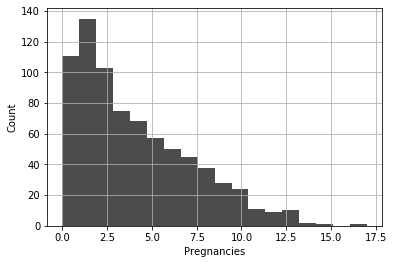

In [10]:
# Plot histogram of column Pregnancies
ax = data['Pregnancies'].hist(color='k', alpha=0.7, bins=18) # draw histogram

ax.set_xlabel("Pregnancies")  # set title for x axis
ax.set_ylabel("Count")        # set title for y axis

Text(0, 0.5, 'Count')

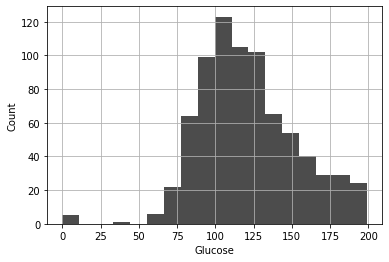

In [11]:
# Plot histogram of column Glucose
ax = data['Glucose'].hist(color='k', alpha=0.7, bins=18) # draw histogram

ax.set_xlabel("Glucose")  # set title for x axis
ax.set_ylabel("Count")    # set title for y axis

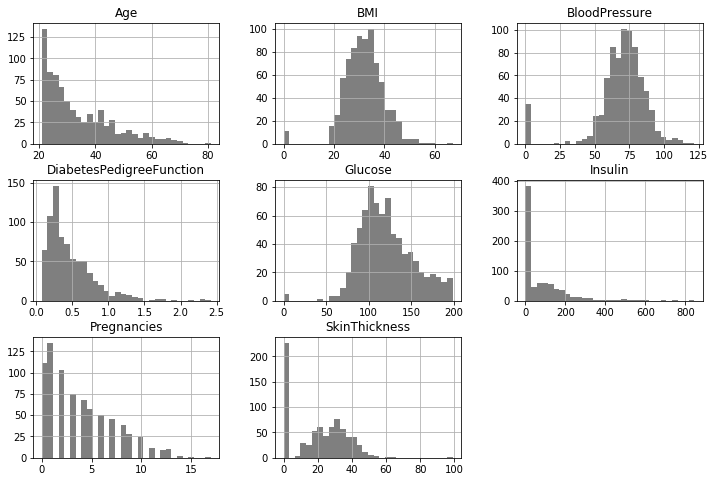

In [12]:
# Plot histogram of every column 
data_wo_outcome = data.iloc[:, 0:8]                                    # pick out columns without outcome
data_wo_outcome.hist(color='k', alpha=0.5, bins=30, figsize=(12, 8));   # draw histogram for each selected attribute

**Univariate Plots - Boxplot**

Text(0, 0.5, 'Pregnancies')

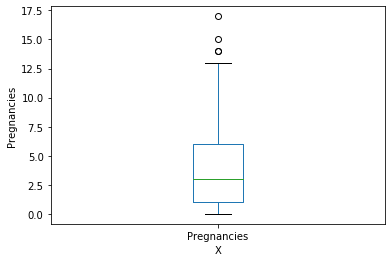

In [13]:
# Plot boxplot of column Pregnancies
ax = data['Pregnancies'].plot(kind = 'box')  # draw boxplot

ax.set_xlabel("X")              # set title for x axis
ax.set_ylabel("Pregnancies")    # set title for y axis

Text(0, 0.5, 'Glucose')

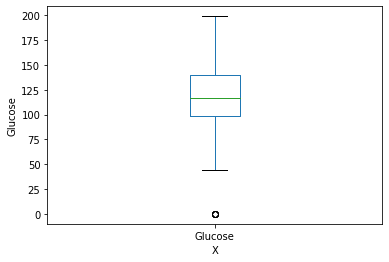

In [14]:
# Plot boxplot of column Glucose
ax = data['Glucose'].plot(kind = 'box')  # draw boxplot

ax.set_xlabel("X")              # set title for x axis
ax.set_ylabel("Glucose")        # set title for y axis

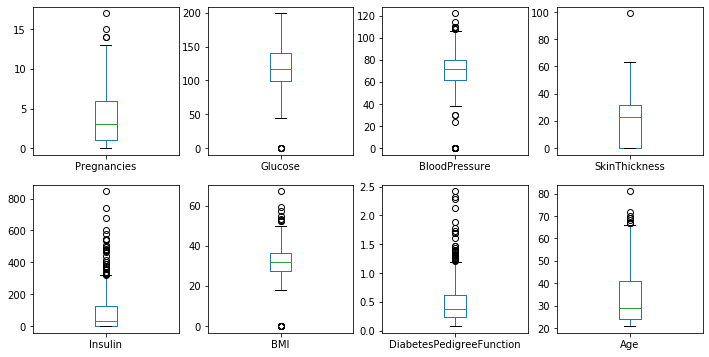

In [15]:
# Plot boxplot of every column 
data_wo_outcome = data.iloc[:, 0:8]                                    # pick out columns without outcome

data_wo_outcome.plot(kind='box', subplots=True, layout=(2, 4), figsize=(12, 6));

**Multivariate Plots - Scatter Plot Matrix**

A scatter plot shows the relationship between two variables as dots in two dimensions, one axis for each attribute. You can create a scatter plot for each pair of attributes in your data. Drawing all these scatter plots together is called a scatter plot matrix. Scatter plots are useful for spotting structured relationships between variables, like whether you could summarize the relationship between two variables with a line. Attributes with structured relationships may also be correlated and good candidates for removal from your dataset.

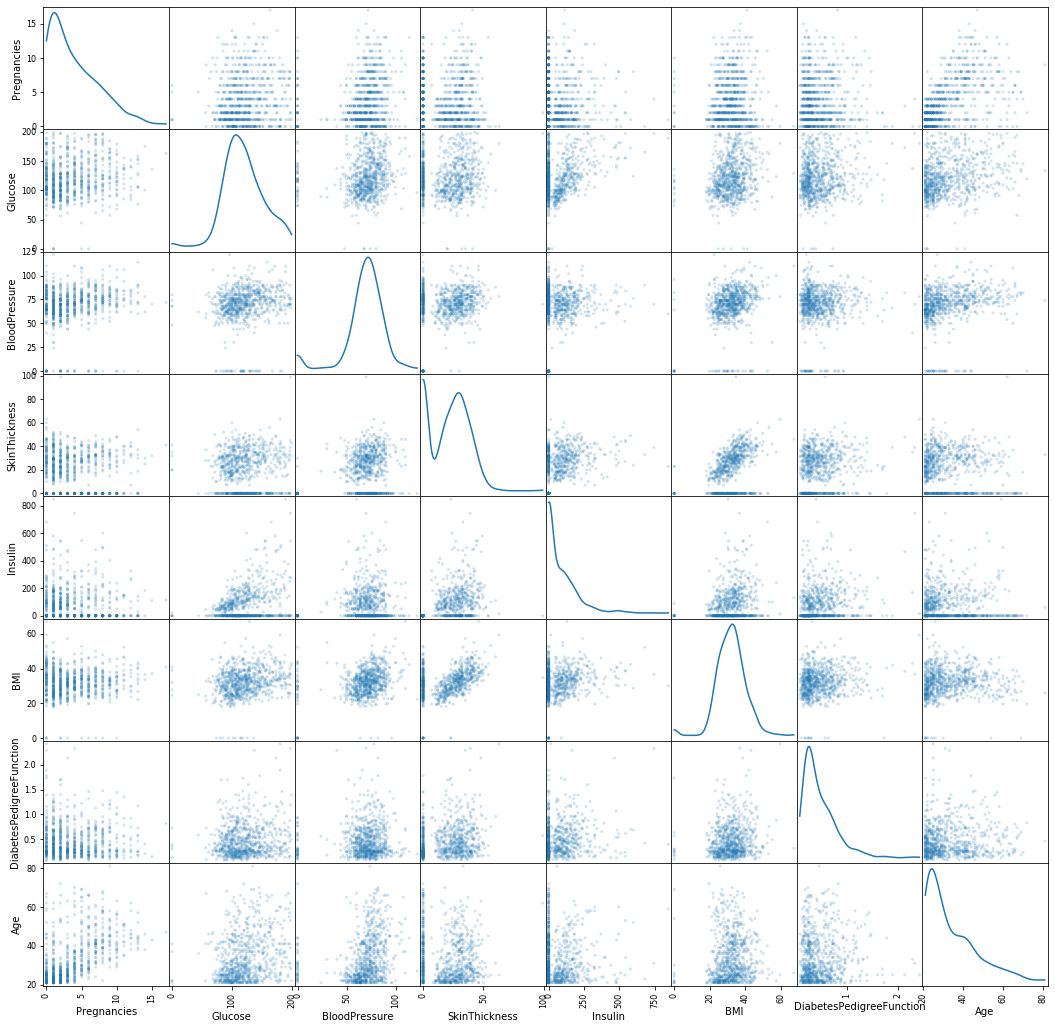

In [16]:
from pandas.plotting import scatter_matrix

scatter_matrix(data_wo_outcome, alpha=0.2, figsize=(18, 18), diagonal='kde');

## 3. Data preparation

### 3.1 Data cleaning
Never assume the data is clean. If anything strange gets observed during exploratory data analysis in step 2, clarify with the data owner immediately. In our case, the dataset author has kindly preprocessed and clean our data.

### 3.2 Data transforms
Many machine learning algorithms make assumptions about your data. It is often a very good idea to prepare your data in such a way to best expose the structure of the problem to the machine learning algorithms that you intend to use.

The good news about decision tree and random forest algorithm is that they are robust to outliers and do not make specific assumption about feature distribution. Therefore, data preprocessing such as scaling or normalization is not needed.

### 3.3 Feature selection
Feature selection is a process where you automatically select those features in your data that contribute most to the prediction variable or output in which you are interested. In step 6.1, We'll explore how to perform feature selection by feature importance analysis. 

## 4. Modellling and Model Evaluation

### Mini Warm-up!
 How to decide the variety of a bear if we know its **color** and **where it lives**? 
 
 <ul>
    <li> <u>Feature</u>: (color, habitat) </li>
    <li> Is the bear black or white ? Both? </li>
    <li> Does the bear live in China ? North Pole? </li>
</ul>

<img src="images/illuDeciTree.png">

Solve the classification problem by asking a few questions, which can be implemented by `IF statements`.

### Intro to Decision Trees

Decision Tree it's a hierarchical data structure implementing the divide-and-conquer strategy. We can think of Decision Tree model as:
- Series of `IF-ELSE-THEN` rules
- Can be used for **classification** and **regression** problems
- Has two parts: **decision nodes** and **leaf nodes**

#### Components of Decision Tree
**1. Decision Nodes (internal node)** - Implementing a rule/function with discrete outcomes labeling the brances, and the decision is made based on input data. It help determine the sub-space.

**2. Leaf Node (terminal node)** - The *decision* or value that constitutes the output which help determine the label of the sub-space. 


#### Mechanism of Decision Tree
The decision tree is trying to recursively split the feature space so that most of the resulting samples in each sub-space belong to the sample class.

<img src="images/splitspace.png">

### 4.1 Train-test split

The simplest method that we can use to evaluate the performance of a machine learning algorithm is to use different training and testing datasets. We can take our original dataset and split it into two parts. Train the algorithm on the first part, make predictions on the second part and evaluate the predictions against the expected results. The size of the split can depend on the size and specifics of your dataset, although it is common to use 67% of the data for training and the remaining 33% for testing.

In [17]:
import numpy as np

# Split the dataset (X and Y) into training and testing sets
from sklearn.model_selection import train_test_split

X = data.loc[:, ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 
                 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']]
Y = data.loc[:, ['Outcome']]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=1)

### 4.2 Train model

Using `DecisionTreeClassifier`, which define a Decision Tree model, as a classifier (model) for classification. 

Using `.fit()` function to train the model with given data **X** and **Y**.

In [18]:
# Train a random forest on the training data
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(random_state=1, max_depth=7)
tree_clf = tree_clf.fit(X_train, Y_train)

### 4.3 Test evaluation metric

Classification accuracy is the number of correct predictions made as a ratio of all predictions made.

In [19]:
# Predict the class labels of the training and testing data
Y_pred_train = tree_clf.predict(X_train)
Y_pred_test  = tree_clf.predict(X_test)

# Compute the classification accuracy
from sklearn import metrics

acc_train = metrics.accuracy_score(Y_train, Y_pred_train)
acc_test  = metrics.accuracy_score(Y_test,  Y_pred_test)

print( "The training accuracy is: ", round(acc_train*100,2), '%')
print( "The testing accuracy is:  ", round(acc_test*100, 2), '%')

The training accuracy is:  91.25 %
The testing accuracy is:   72.44 %


In [20]:
# Area Under Curve (AUC)
fpr, tpr, thresholds = metrics.roc_curve(Y_test, Y_pred_test)
auc = metrics.auc(fpr, tpr)

# Plot ROC AUC Curve
plt.plot(fpr,tpr);
plt.title('Area Under Curve Plot for ROC')
plt.legend(labels=["diabetes data | auc="+str(auc)]);

0.6806226516371443


#### Overfitting problem

<span style="color:#E32636"> The training accuracy is 100% but the testing accuracy is only 70.4% !! </span> The model is not good enough for the test (unseen) data. <span style="color:#225B91">This is known as _**overfitting**_. </span>

**How to avoid Overfitting?**

+ <u>Tree Pruning</u> : For decision trees, maximum depth of the tree,  minimum samples at the leaf node, the number of features to consider at each node are some of the hyperparameters. We can reduce the complexity of our model by pruning some tree leafs
+ <u>Ensemble methods</u>: Combine the predictions of several base models. In our case, combine the predictions of several decision trees. Bagging Decision Trees and Random Forest are the popular decision tree based ensemble methods.

## 5. Random Forest: Bagging and Ensembling

**Random Forest**: a popular ensemble of decision tree. 

Random Forest =  _bagging_ + _random subspace_.
<ul>
    <li>Bagging: train each base model using *bootstrapped* version of the *training data*. The training data for each base model is constructed by sampling from the original data _uniformly and with replacement_.    
    <li>Random subspace: <span style="color:#E32636">Remember that each node except the leaf nodes of a decision tree use a single feature and a threshold to direct the samples into left and right child node? </span> In standard decision trees, a feature is selected from a pool of all the features. However, decision trees in Random Forest pick the feature from a pool of random subset of features instead of all the features. Ensemble based on this technique is known as random subspace.

<img src="images/bagging.png" width="650px">

Both of these methods, de-correlate individual trees. The predictions of the decision trees are combined using majority voting (or in some cases weighted voting).

Below, we access the performance of Random Forest in both classification and regression problems.
In general, Random Forest requires less hyperparameter tuning comparing to other machine learning algorithms such as neural networks and gradient boosting machines. 

In below, we tune several parameters as follows. Feel free to tune and try out different numbers.

- `max_depth`: Maximum depth that a tree can grow. The deeper the depth, the more our random forest become complicated. 
- `n_estimators`: Number of trees to be ensembled in random forest. Ensembling technique used is majority voting.

    

In [23]:
from sklearn.ensemble import RandomForestClassifier

# re-train the model
forest_clf = RandomForestClassifier(max_depth=7, n_estimators=300, random_state=1) 
forest_clf = forest_clf.fit(X_train, Y_train)

In [24]:
# Accuracy
Y_pred_train = forest_clf.predict(X_train)
Y_pred_test  = forest_clf.predict(X_test)

# Compute the classification accuracy
from sklearn import metrics

acc_train = metrics.accuracy_score(Y_train, Y_pred_train)
acc_test  = metrics.accuracy_score(Y_test,  Y_pred_test)

print( "The training accuracy is: ", round(acc_train*100,2), '%')
print( "The testing accuracy is:  ", round(acc_test*100, 2), '%')

The training accuracy is:  94.36 %
The testing accuracy is:   79.13 %


Notice an improvement in the generalization on test data? Random forest model is more stable than decision trees. For further understanding, you can refer to the </span> <span style="color:#225B91"> bias-variance analysis </span> in your own time.

In [25]:
x = forest_clf.predict_proba(X_test)

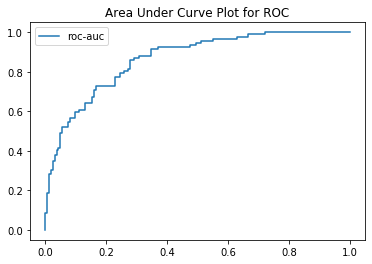

In [26]:
# Area Under Curve (AUC)
Y_proba_test = forest_clf.predict_proba(X_test)[::,1]
fpr, tpr, thresholds = metrics.roc_curve(Y_test, Y_proba_test)
auc = metrics.auc(fpr, tpr)

# Plot ROC AUC Curve
plt.plot(fpr,tpr);
plt.title('Area Under Curve Plot for ROC')
plt.legend(labels=["diabetes data | auc="+str(auc)]);

## 6. Model understanding

### 6.1 Feature importance

In [27]:
# Feature names
f_names = ['Preg.', 'Gluc.', 'BPre.', 'SkTh.', 'Insu.', 'BMI  ', 'DiPe.', 'Age  ']

# Compute and print the feature ranking
imp_feat_rf = forest_clf.feature_importances_
indices = np.argsort(imp_feat_rf)[::-1] # sort the features according to their importance

print("Feature ranking:\n")

for f in range (X_train.shape[1]):
    print("%d. %s   (%f)" % (f+1, f_names[indices[f]], imp_feat_rf[indices[f]]))

Feature ranking:

1. Gluc.   (0.274088)
2. BMI     (0.187972)
3. Age     (0.129045)
4. DiPe.   (0.120106)
5. BPre.   (0.079524)
6. Insu.   (0.076586)
7. Preg.   (0.072200)
8. SkTh.   (0.060478)


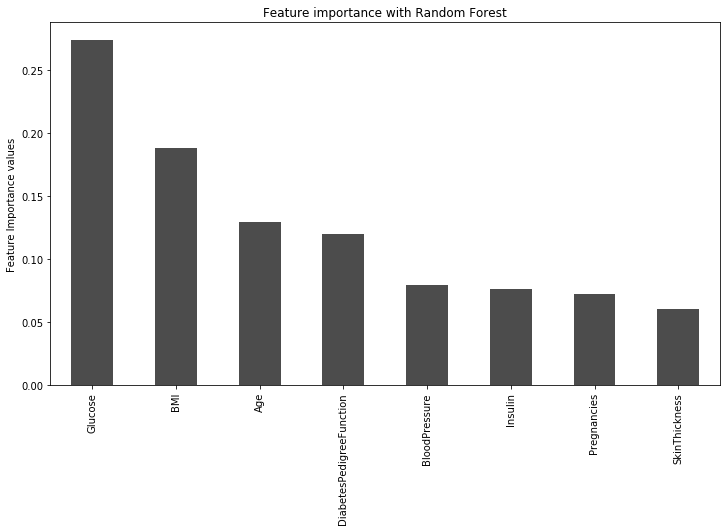

In [28]:
# Plot the features
ind = X_train.columns

imp_feat_rf = pd.Series(imp_feat_rf,ind).sort_values(ascending=False)
imp_feat_rf[:].plot(kind='bar', title='Feature importance with Random Forest', 
                    color = 'k', alpha=0.7, figsize=(12,8))
plt.ylabel('Feature Importance values')
plt.subplots_adjust(bottom=0.25)
plt.show()

### 6.2 Visualise Decision Tree
For each pair of iris features, the decision tree learns decision boundaries made of combinations of simple thresholding rules inferred from the training samples.

Now, how do we understand our decision tree model's decision? Can we even interpret our mathematical model? 

> In rapid development of AI, interpretability is key as it is a cornerstone of the rules and processes that are defined. As correlation often does not equal causality, a solid model understanding is needed when it comes to making decisions and explaining them.

Now luckily, *Decision Tree* model is an easily interpretable model. Here, we can even visualize their decision!

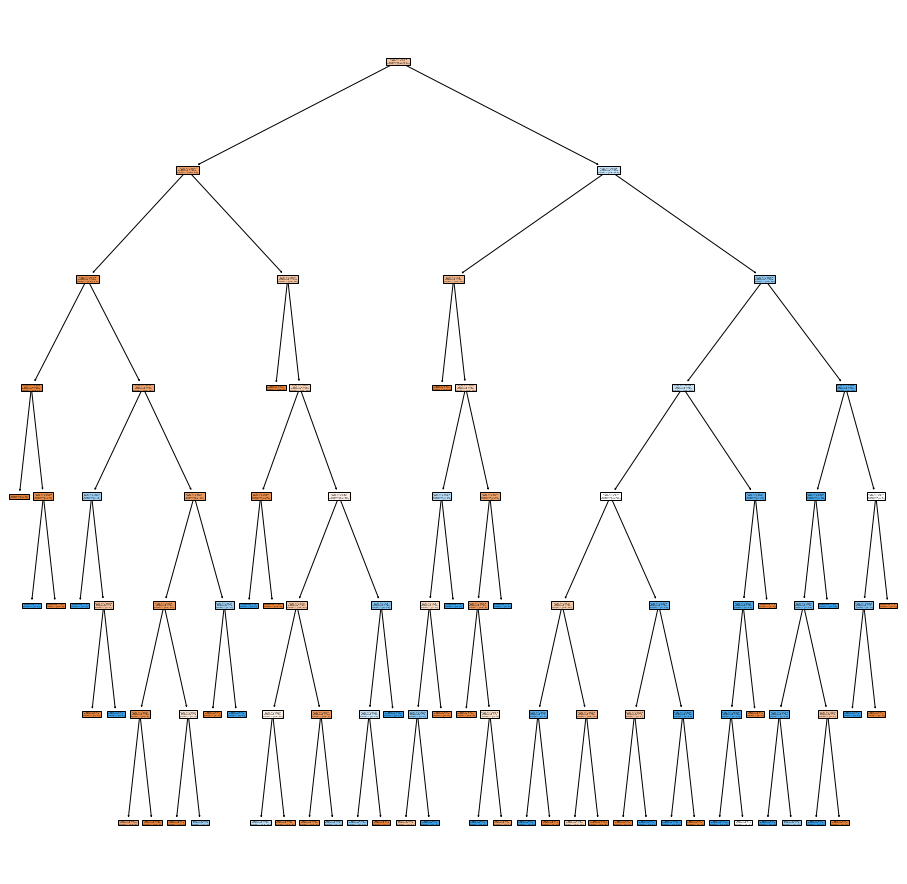

In [29]:
# Decision Tree
plt.figure(figsize=(16,16))
plot_tree(tree_clf, filled=True)
plt.show()

### 6.3 Partital dependence plot [optional]

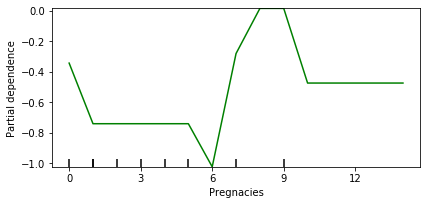

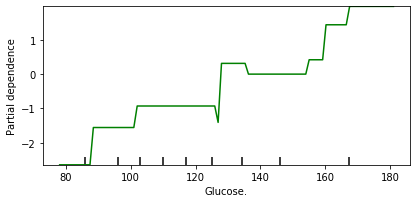

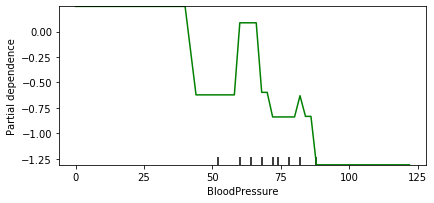

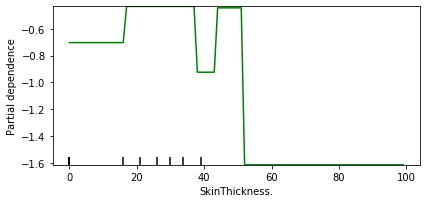

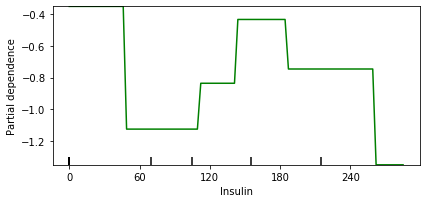

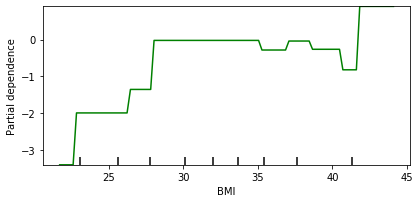

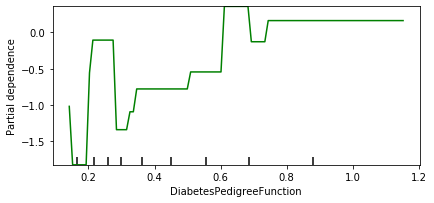

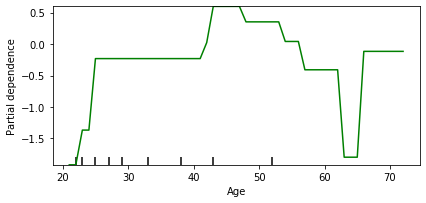

In [30]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble.partial_dependence import plot_partial_dependence

clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)\
        .fit(X_train, Y_train)
f_importance = clf.feature_importances_  

f_names = ['Pregnacies', 'Glucose.', 'BloodPressure', 'SkinThickness.', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

for i in range(X_train.shape[1]):
    fig, axs = plot_partial_dependence(clf, X_train, [i], feature_names=f_names)